In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_380.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_517.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_364.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_258.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_237.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_476.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_563.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_159.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_464.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_518.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_141.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_398.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_442.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_443.jpg
/kaggl

In [2]:
import matplotlib.pyplot as plt
import  seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_dir='/kaggle/input/cats-and-dogs-image-classification/train'
test_dir='/kaggle/input/cats-and-dogs-image-classification/test'

In [4]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

train_gen=train_data.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_gen=test_data.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


convolutional neural networks

In [5]:
model=Sequential()

In [6]:
#creating  networks
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))





In [7]:
#getting the summary of the data to know how many parameters to deal with throughout the images
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [8]:
#training our modes using optimizers
#we compile the networks so that all tha layers are connected to each other
#learning rate written in exponential form
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3),metrics=['accuracy'])

In [9]:
#filter the model
#fit generator is used to train our model
history=model.fit_generator(train_gen,steps_per_epoch=train_gen.samples//20,epochs=10,validation_data=test_gen,validation_steps=test_gen.samples//20)

/tmp/ipykernel_20/2678629198.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_gen,steps_per_epoch=train_gen.samples//20,epochs=10,validation_data=test_gen,validation_steps=test_gen.samples//20)


Epoch 1/10
27/27 [==============================] - 42s 2s/step - loss: 0.8770 - accuracy: 0.5140 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 40s 1s/step - loss: 0.6966 - accuracy: 0.5196 - val_loss: 0.9235 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - 40s 1s/step - loss: 0.7001 - accuracy: 0.5196 - val_loss: 0.6920 - val_accuracy: 0.4929
Epoch 4/10
27/27 [==============================] - 40s 1s/step - loss: 0.7113 - accuracy: 0.4935 - val_loss: 0.6876 - val_accuracy: 0.5786
Epoch 5/10
27/27 [==============================] - 40s 1s/step - loss: 0.7348 - accuracy: 0.5605 - val_loss: 0.6800 - val_accuracy: 0.6000
Epoch 6/10
27/27 [==============================] - 40s 1s/step - loss: 0.6806 - accuracy: 0.5847 - val_loss: 0.6818 - val_accuracy: 0.6071
Epoch 7/10
27/27 [==============================] - 40s 1s/step - loss: 0.6826 - accuracy: 0.5847 - val_loss: 0.6724 - val_accuracy: 0.5786
Epoch 8/10
27/27 [==

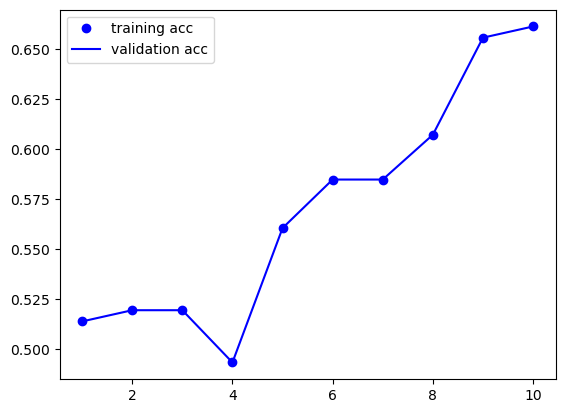

In [10]:
#plotting the accuracy and the loss
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,acc, 'b',label='validation acc')
plt.legend()



plt.show()

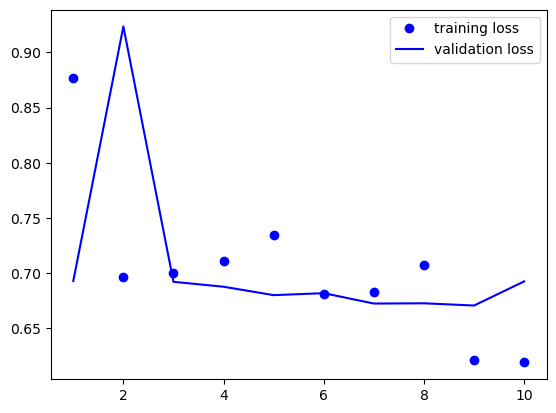

In [11]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend()

In [12]:
model.save('catvsdog.h5')

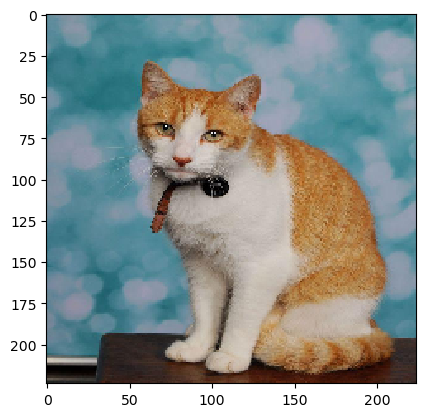

In [13]:
#making prediction

from tensorflow.keras.preprocessing import image
path='/kaggle/input/cats-and-dogs-image-classification/test/cats/cat_1.jpg'
img=image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()